Импортируем библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import ElasticNet, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

Работа с датасетом

In [2]:
# загрузка данных
X_bp = pd.read_csv("X_bp.csv", index_col=0)  # первый датасет
X_nup = pd.read_csv("X_nup.csv", index_col=0)  # второй датасет

# объединение по индексу
data = X_bp.join(X_nup, how="inner")

Общая информация по датасету

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки           

Проверка на пропущенные значения

In [16]:
data.isnull().sum()

,0
Соотношение матрица-наполнитель,0
"Плотность, кг/м3",0
"модуль упругости, ГПа",0
"Количество отвердителя, м.%",0
"Содержание эпоксидных групп,%_2",0
"Температура вспышки, С_2",0
"Поверхностная плотность, г/м2",0
"Модуль упругости при растяжении, ГПа",0
"Прочность при растяжении, МПа",0
"Потребление смолы, г/м2",0


Описательная статистика

In [17]:
data.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,73.328571,2466.922843,218.423144,44.252199,6.899222,57.153929
std,0.913222,73.729231,330.231581,28.295911,2.406301,40.943260,281.314690,3.118983,485.628006,59.735931,45.015793,2.563467,12.350969
min,0.389403,1731.764635,2.436909,17.740275,14.254985,100.000000,0.603740,64.054061,1036.856605,33.803026,0.000000,0.000000,0.000000
25%,2.317887,1924.155467,500.047452,92.443497,20.608034,259.066528,266.816645,71.245018,2135.850448,179.627520,0.000000,5.080033,49.799212
50%,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882,0.000000,6.916144,57.341920
75%,3.552660,2021.374375,961.812526,129.730366,23.961934,313.002106,693.225017,75.356612,2767.193119,257.481724,90.000000,8.586293,64.944961
max,5.591742,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,82.682051,3848.436732,414.590628,90.000000,14.440522,103.988901


Тепловая карта корреляции

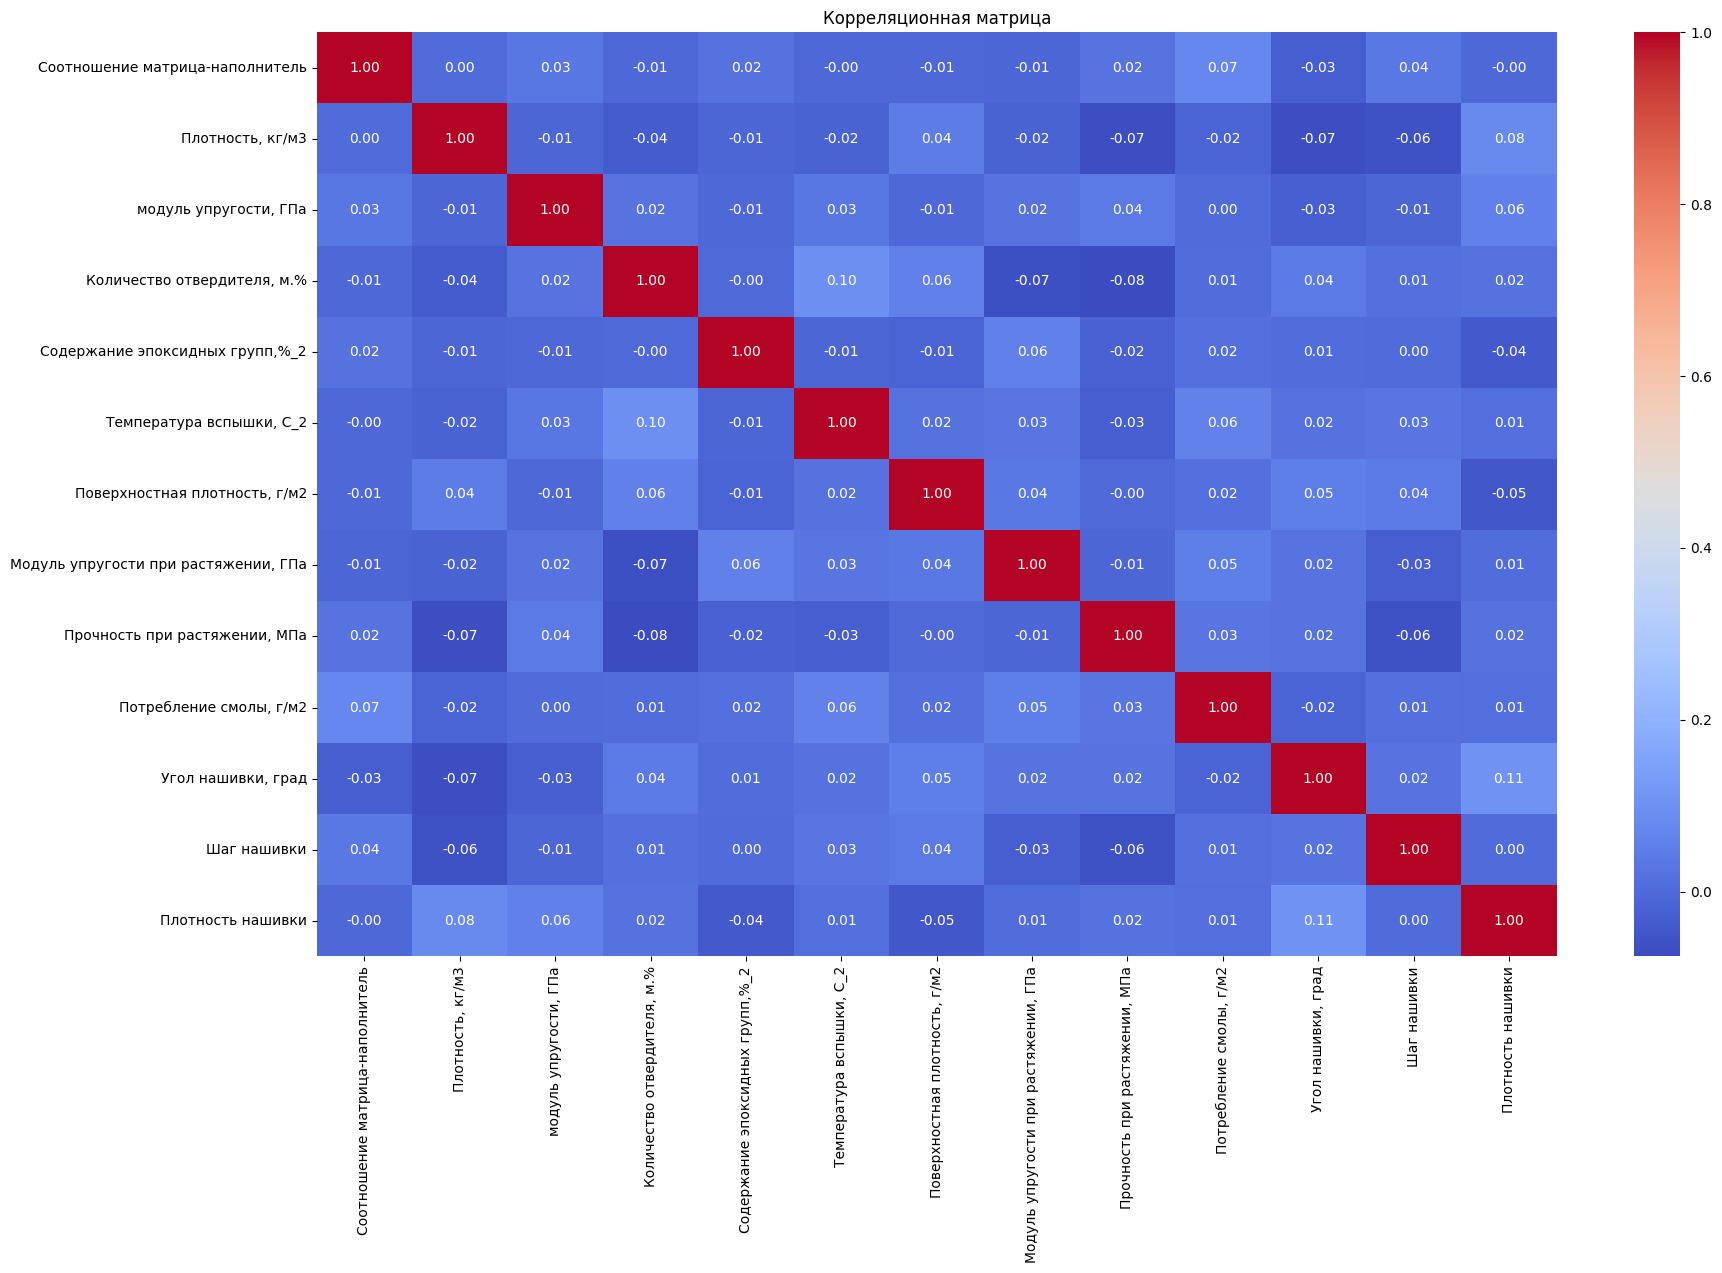

In [20]:
plt.figure(figsize=(20, 12))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Корреляционная матрица")
plt.show()

Диаграммы рассеяния

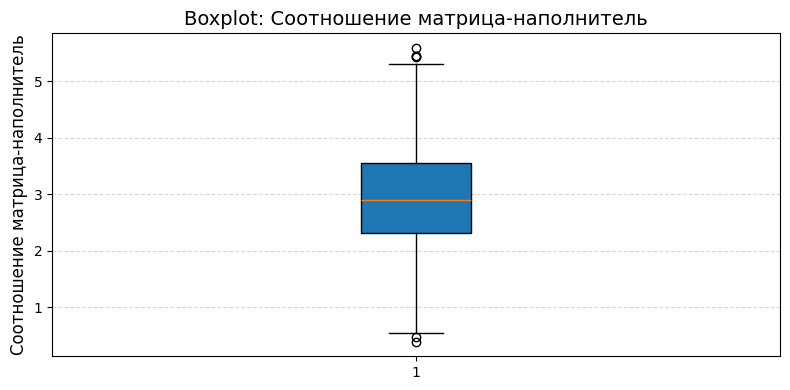

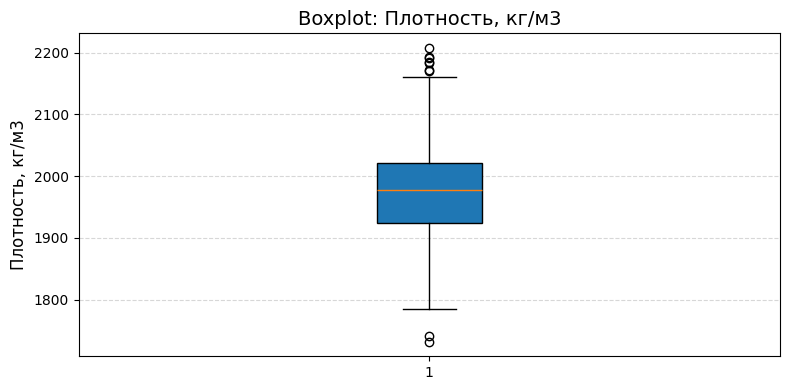

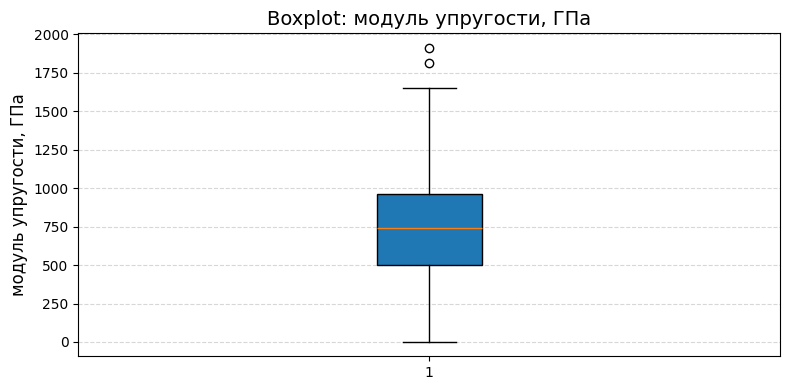

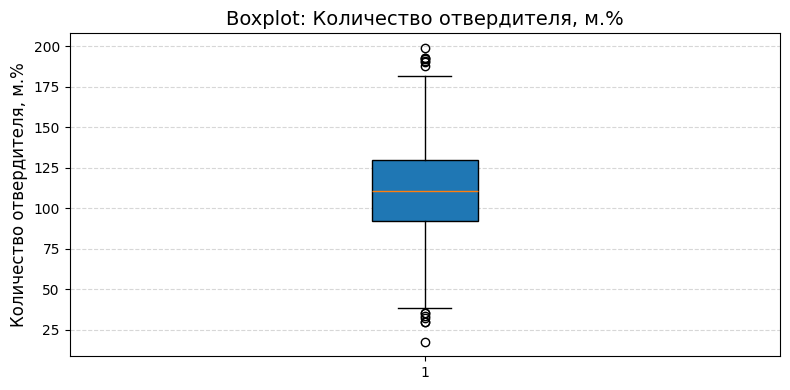

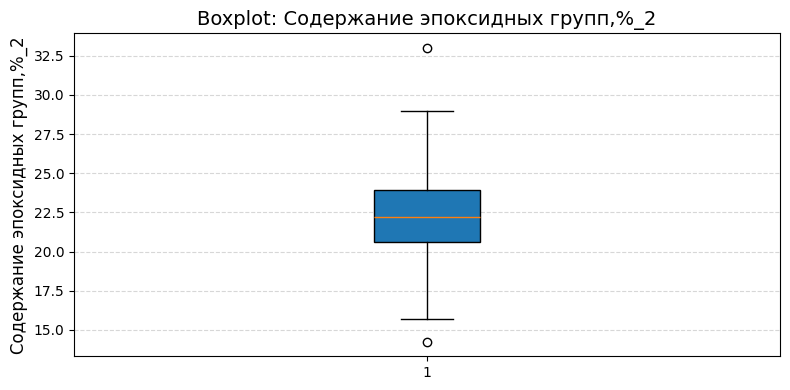

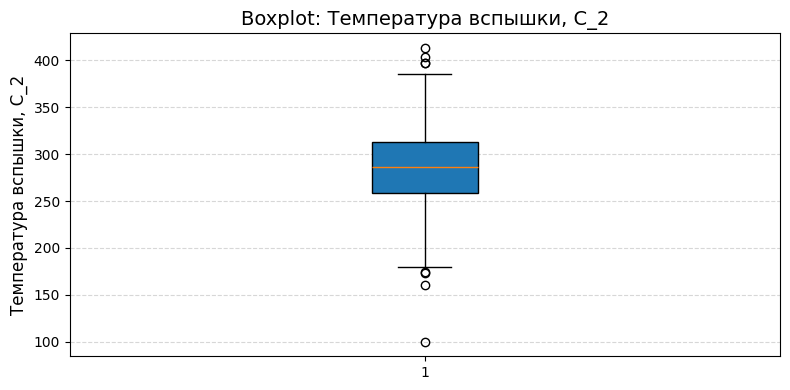

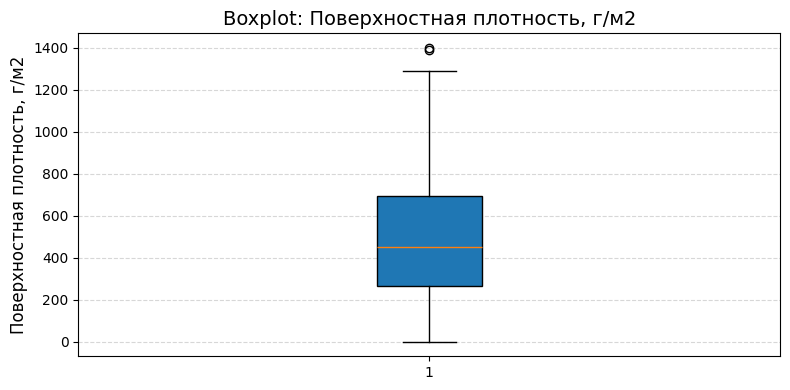

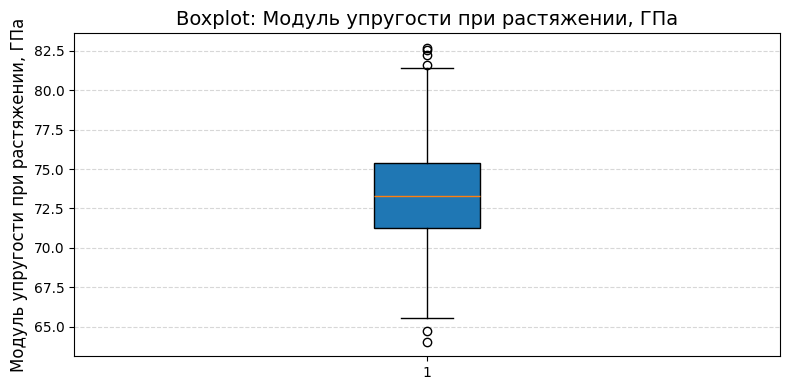

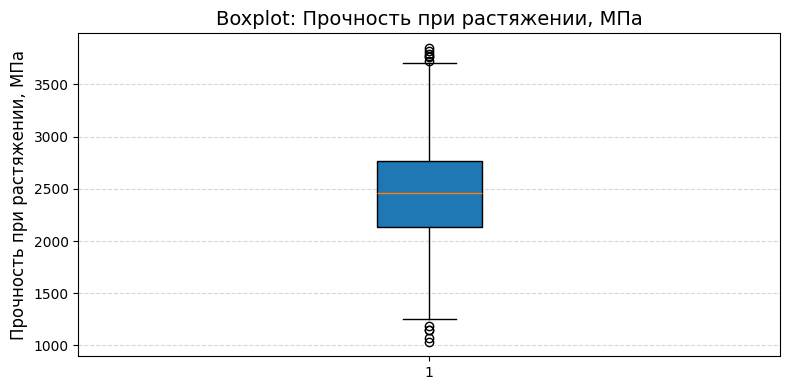

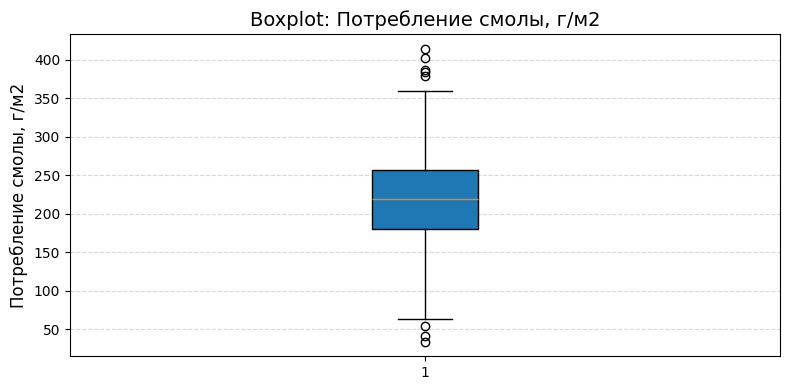

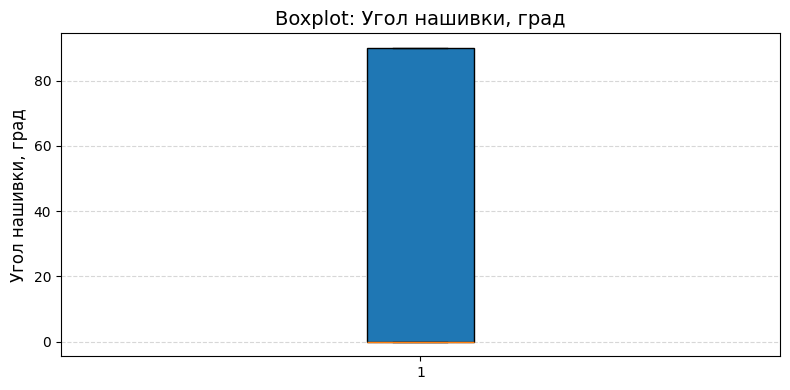

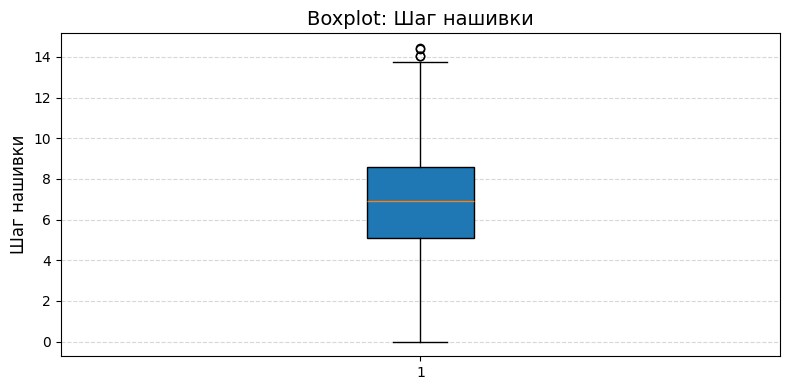

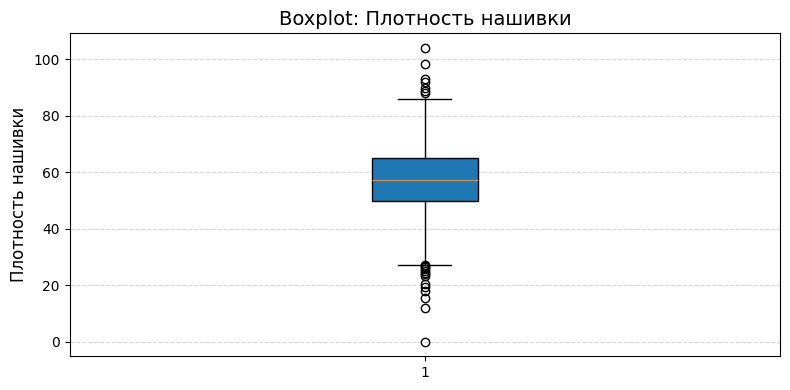

In [28]:
for col in data.columns:
    values = data[col]

    plt.figure(figsize=(8, 4))
    plt.boxplot(values, vert=True, patch_artist=True, showfliers=True)
    plt.title(f'Boxplot: {col}', fontsize=14)
    plt.ylabel(col, fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

Убираем целевые перемнные, а так же перемнные имеющие низкую корреляцию с целевыми

In [3]:
target_columns = ['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа']
low_corr_features = ['Соотношение матрица-наполнитель', 'Температура вспышки, С_2', 'Поверхностная плотность, г/м2', 'Угол нашивки, град', 'Плотность нашивки']
X = data.drop(columns=target_columns)
X = X.drop(columns=low_corr_features)
y = data[target_columns]

Ограничение выбросов (IQR)

In [4]:
def limit_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df.clip(lower=lower_bound, upper=upper_bound)

X = X.apply(limit_outliers)
y = y.loc[X.index]

Разделение на обучающую и тестовую выборку

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)

Гистограммы до нормализации

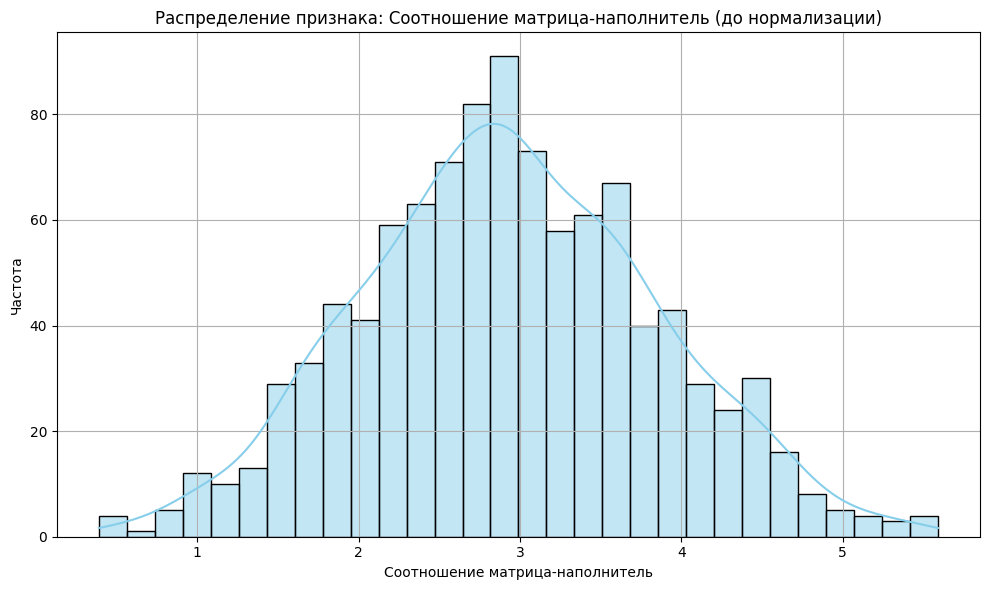

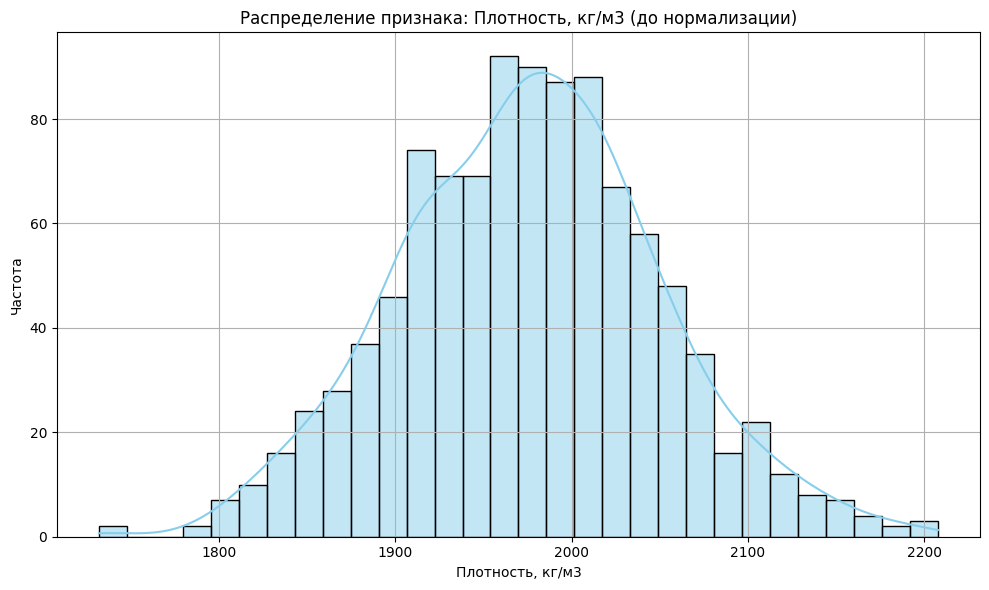

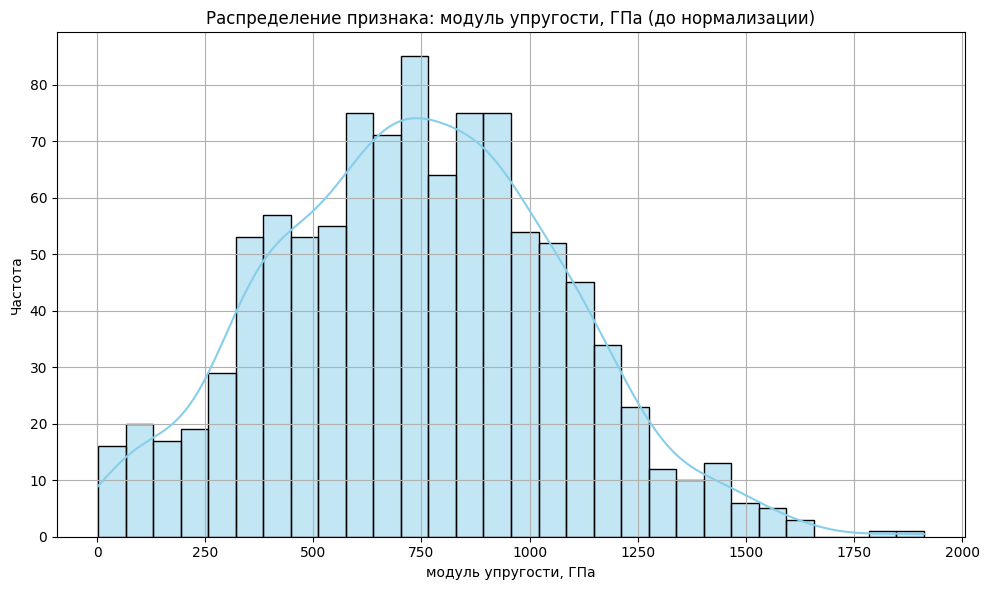

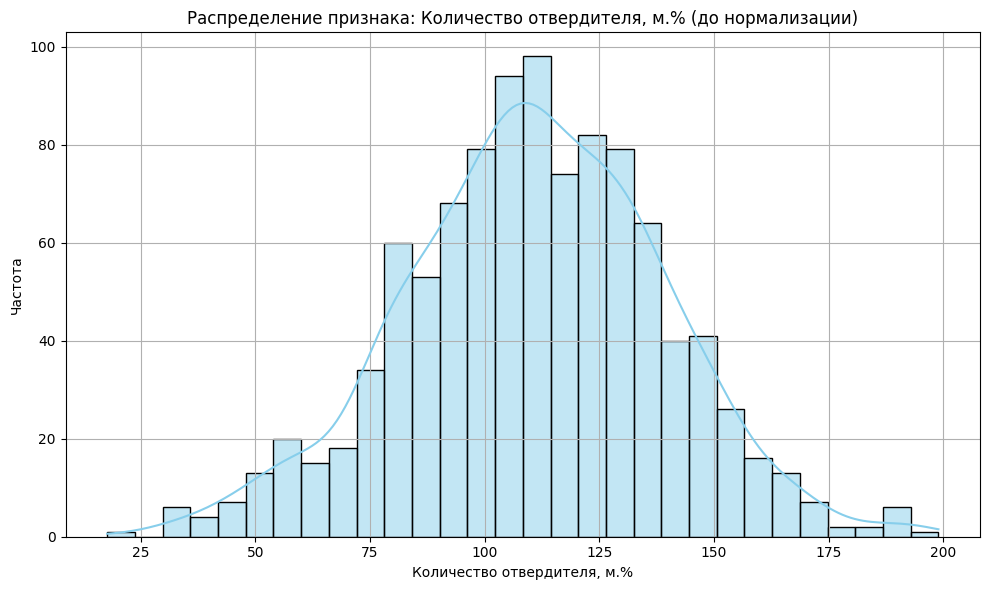

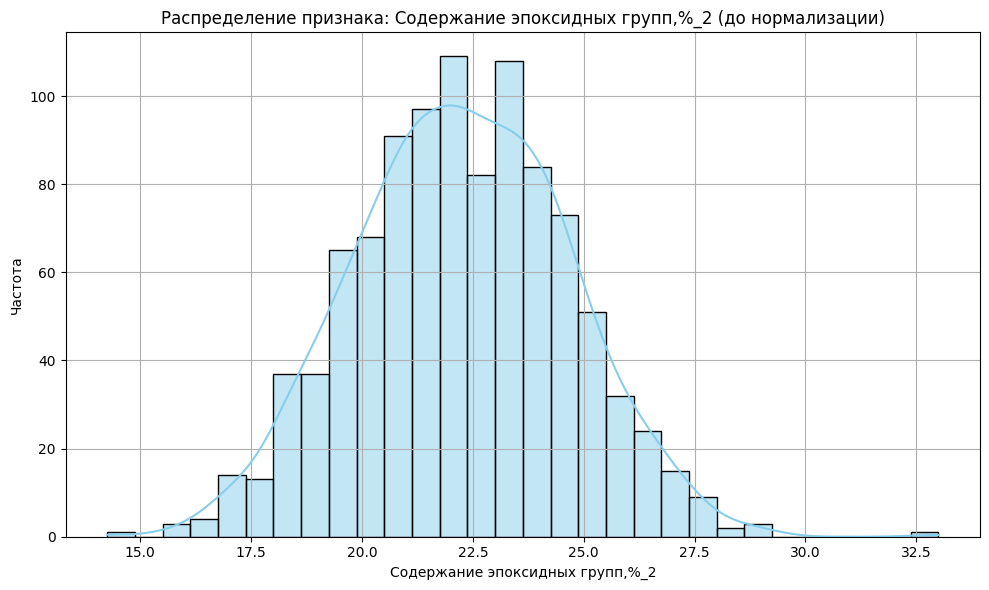

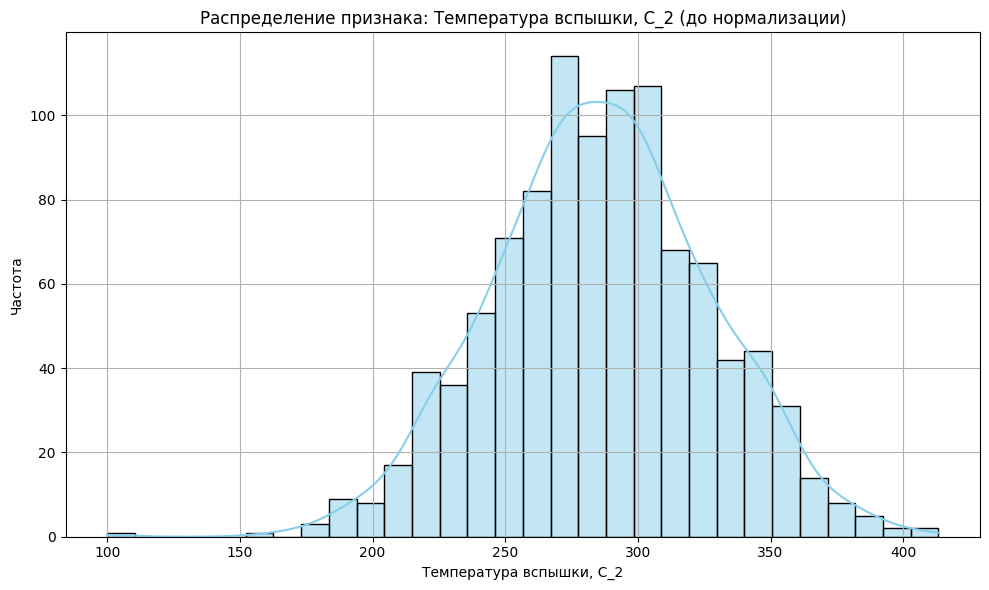

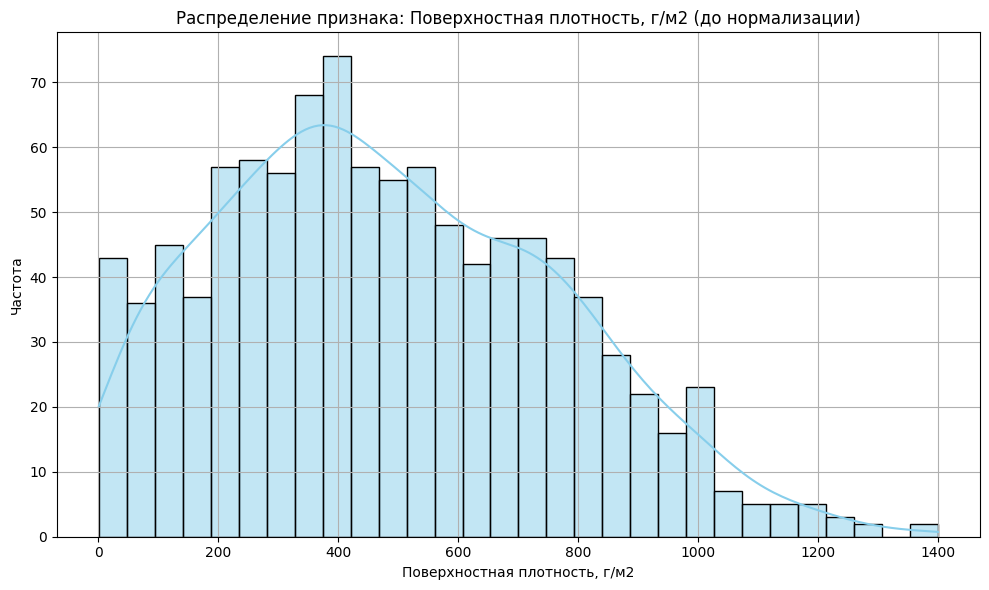

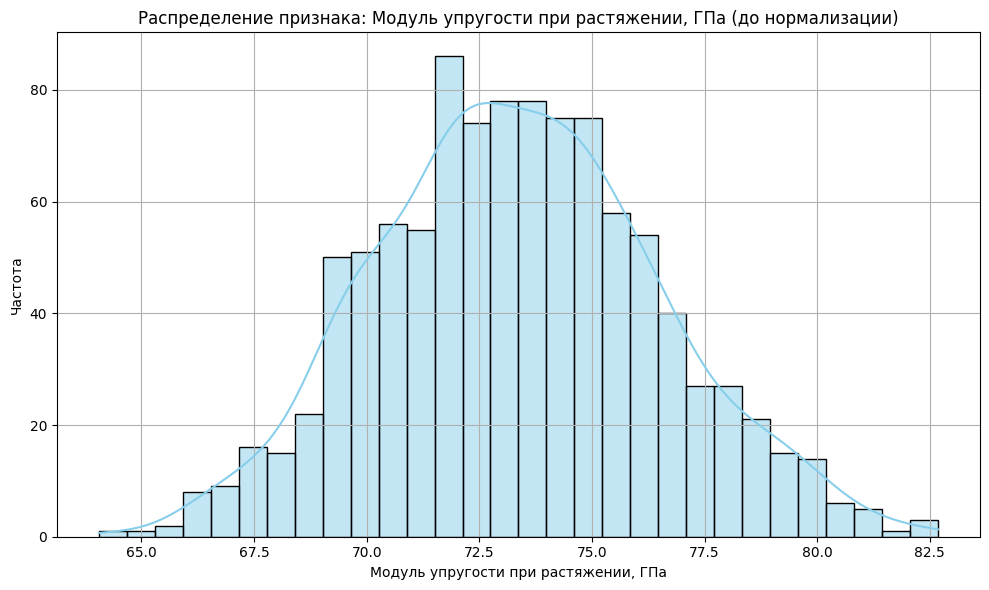

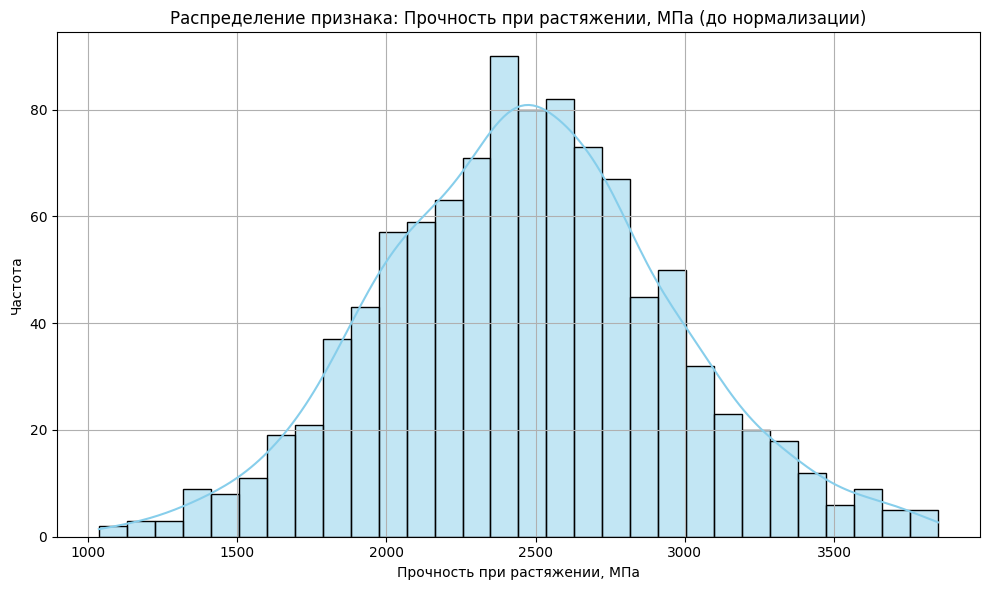

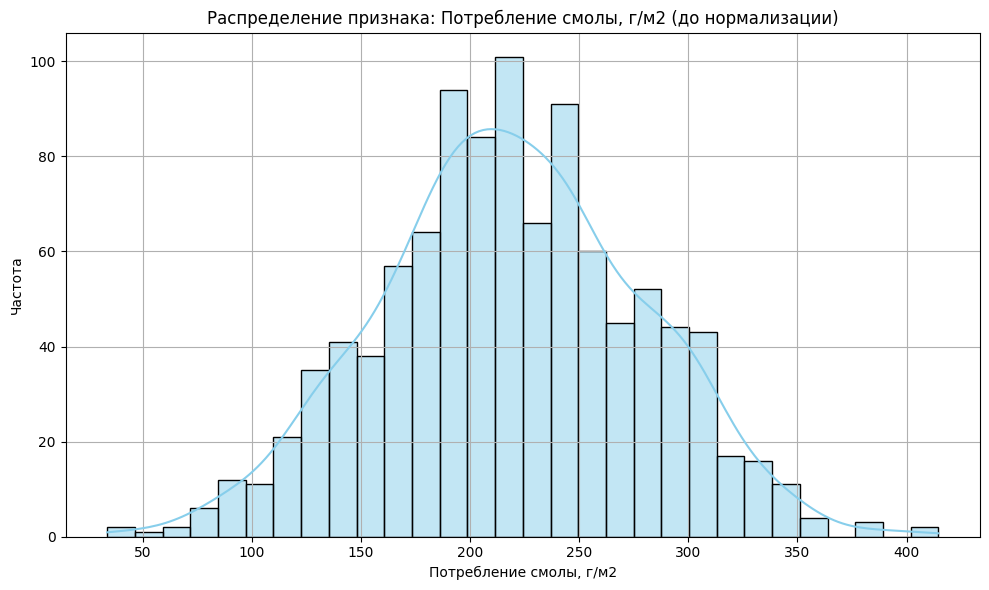

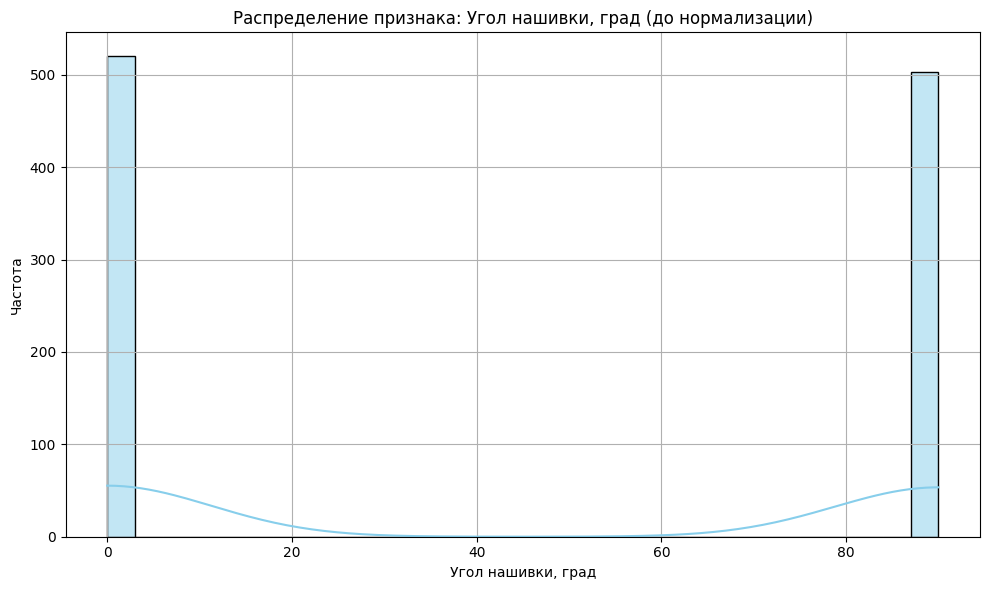

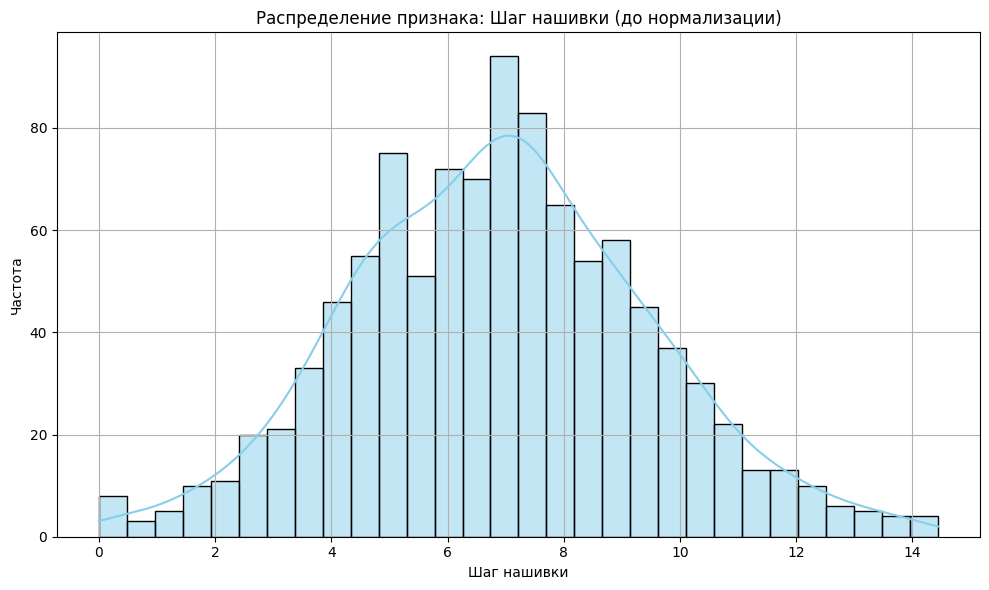

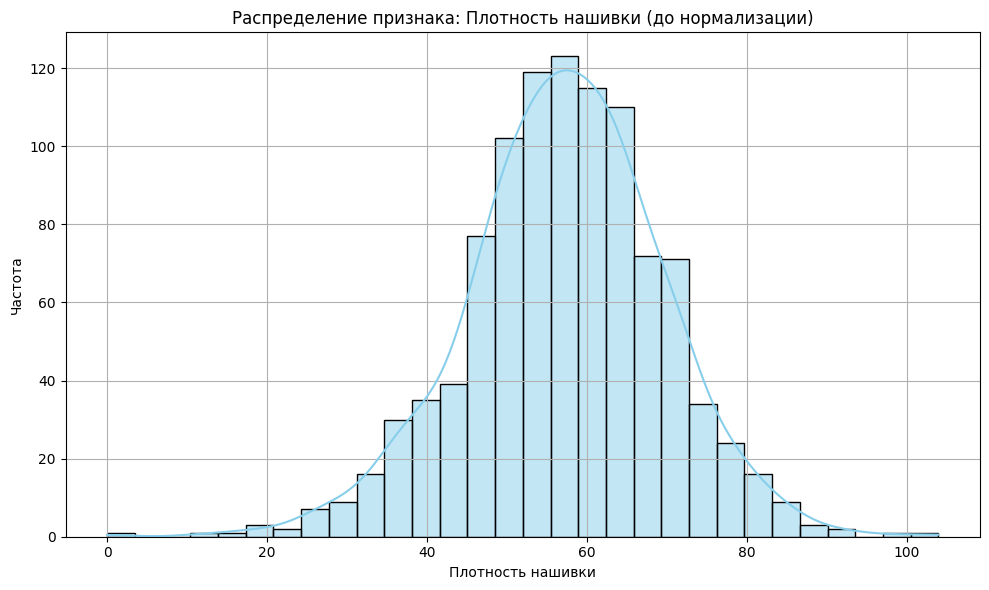

In [22]:
num_column = 0

for col in data.columns:
    num_column += 1
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Распределение признака: {col} (до нормализации)')
    plt.xlabel(col)
    plt.ylabel('Частота')
    plt.grid(True)
    plt.tight_layout()
    # plt.savefig(f"hist_before_{num_column}.png")  # сохраняем для отчета
    plt.show()
    plt.close()

Гистограммы после нормализации

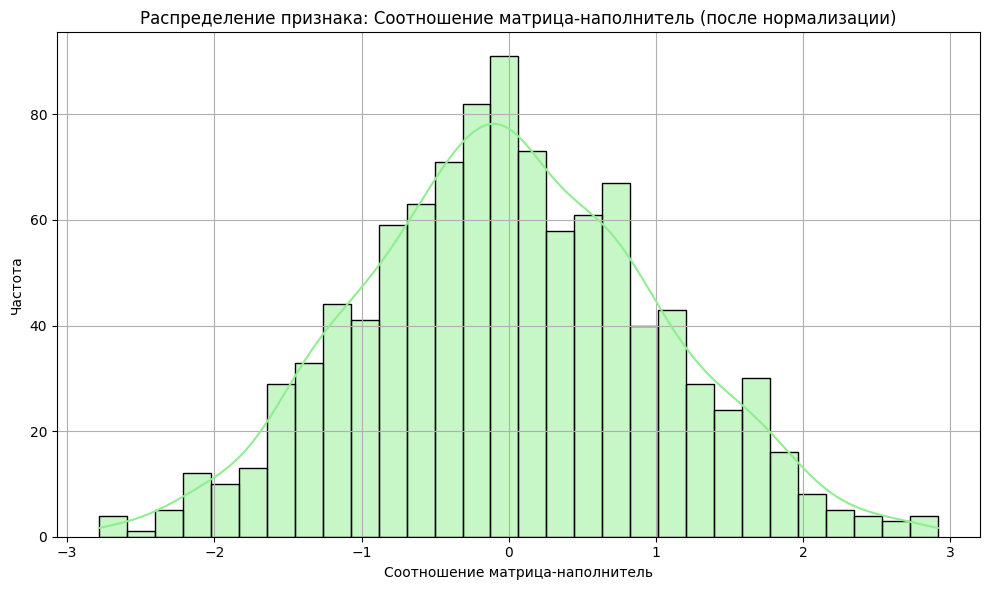

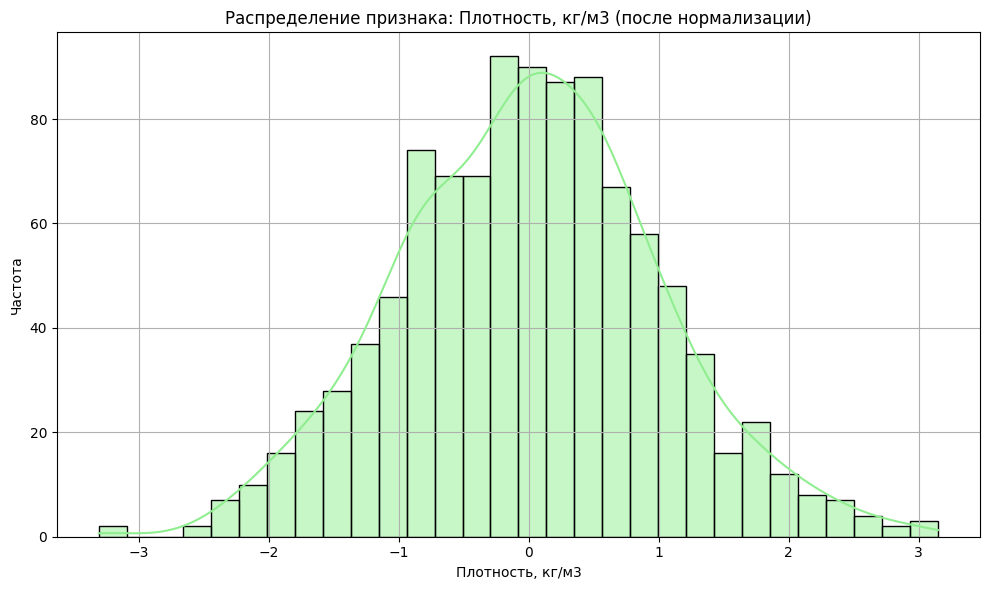

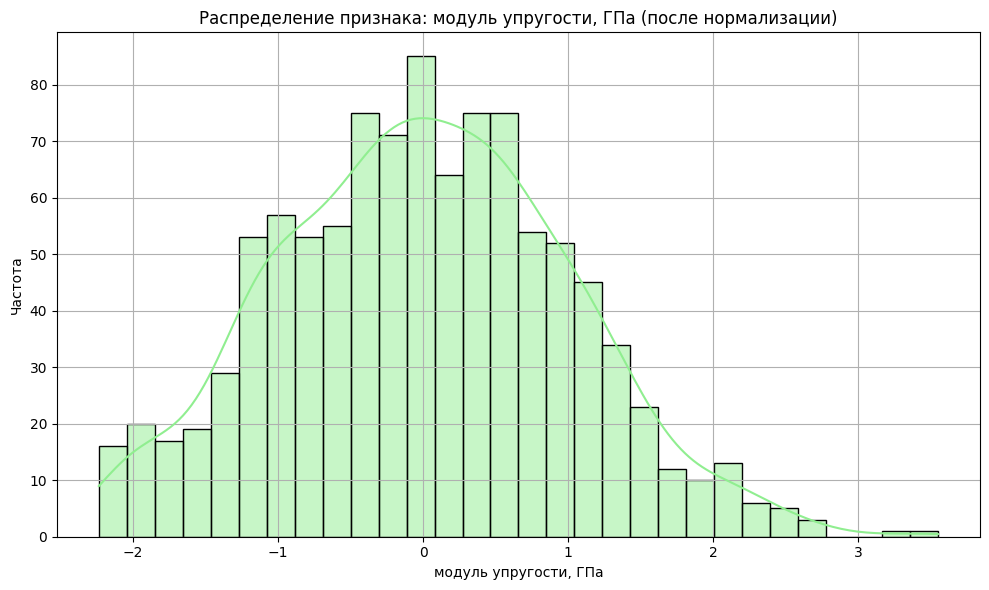

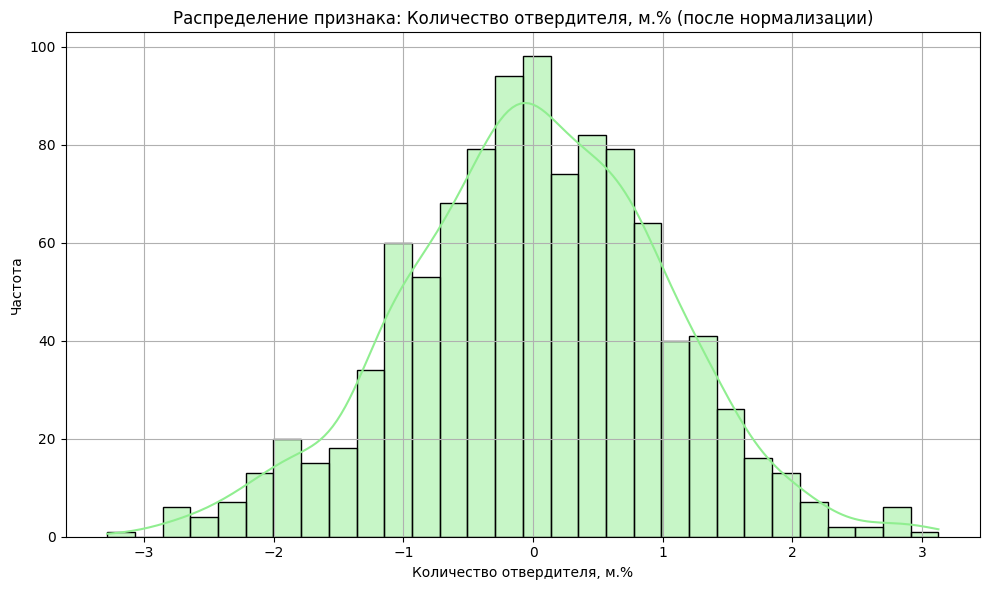

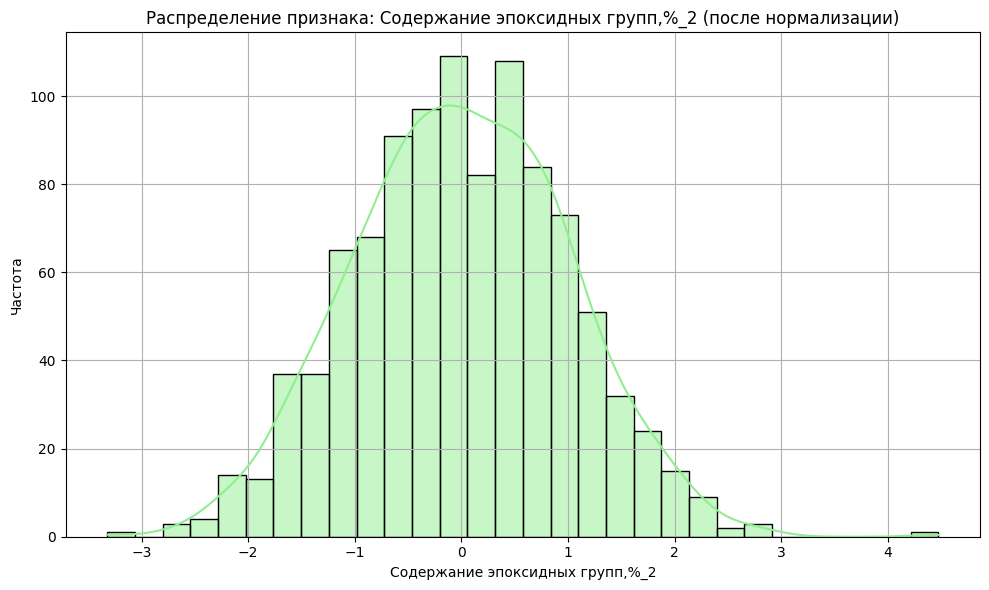

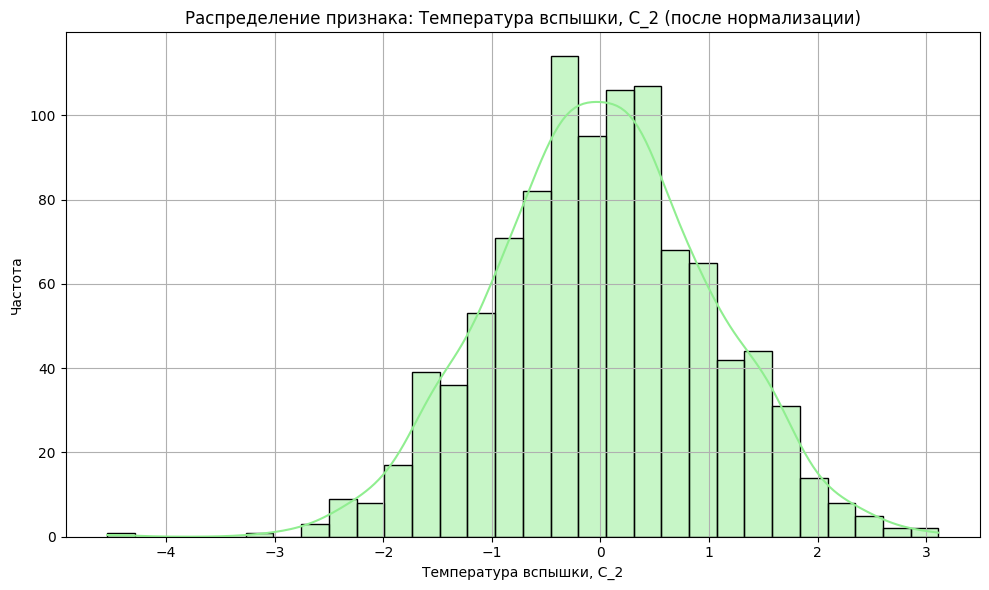

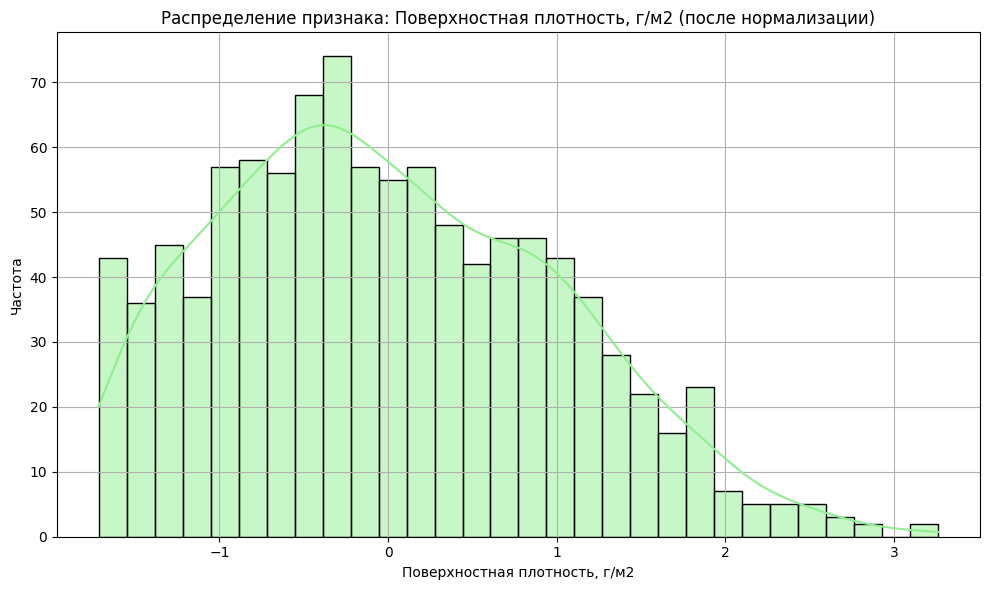

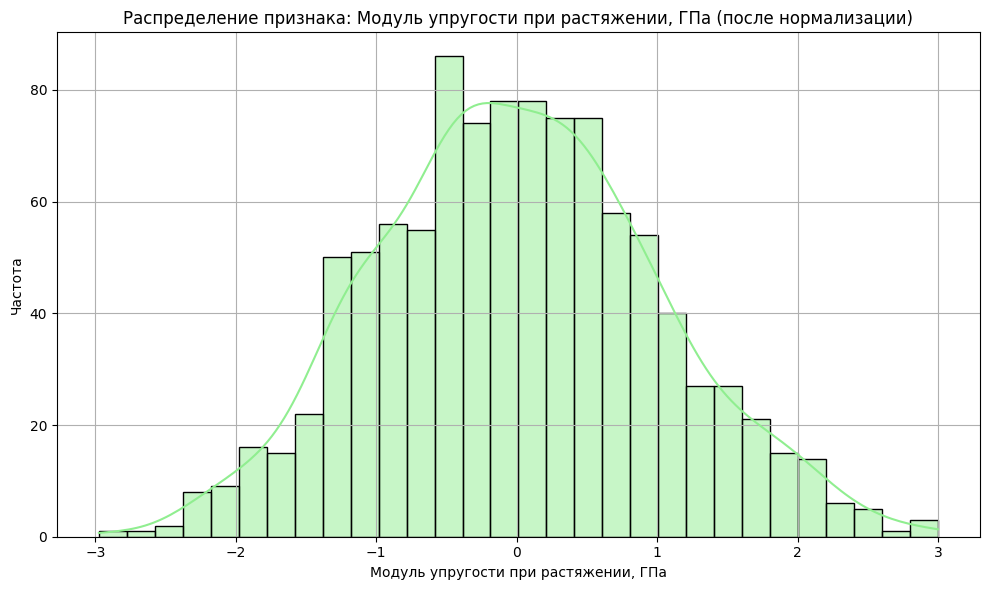

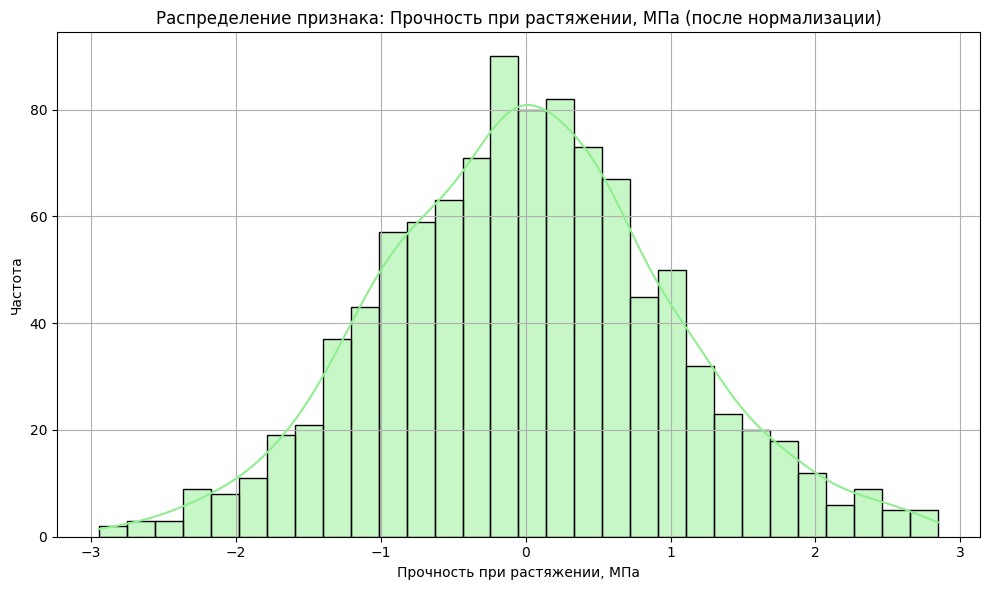

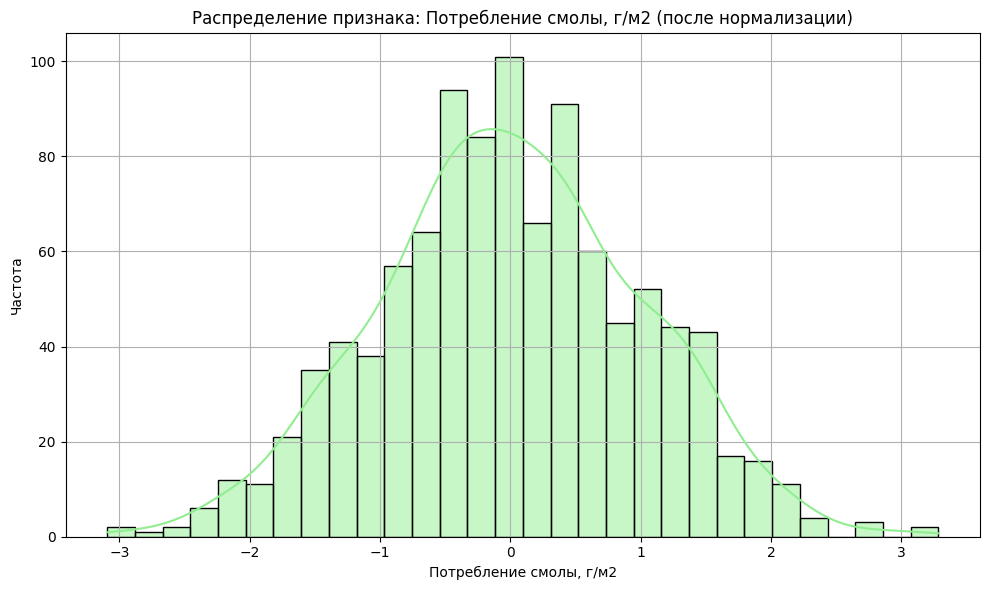

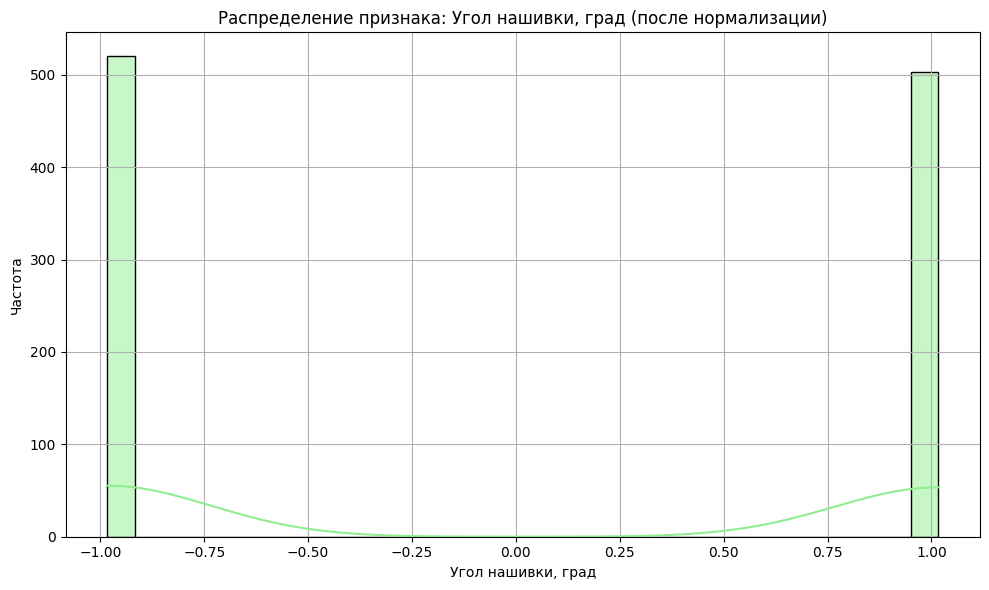

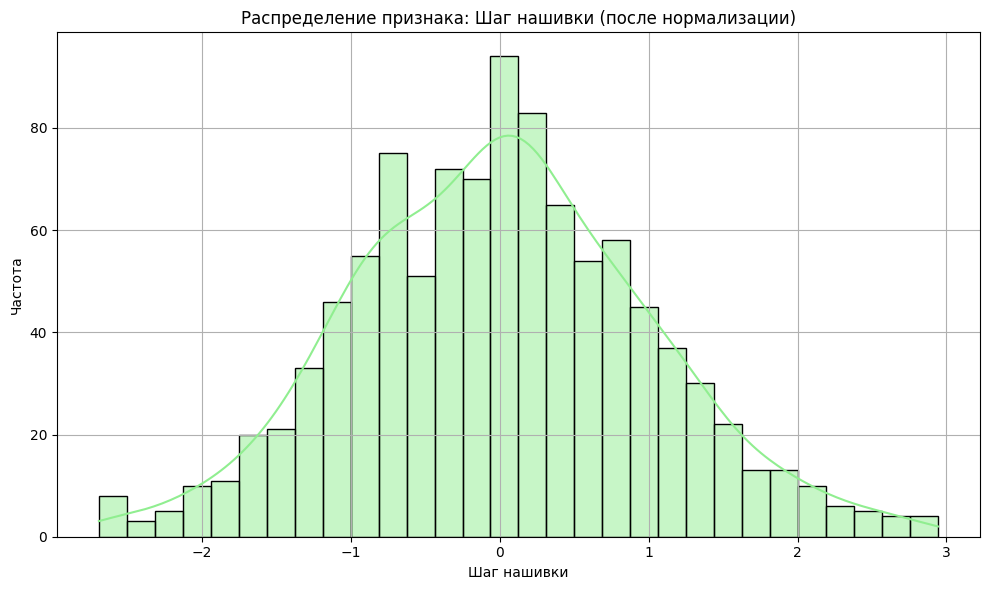

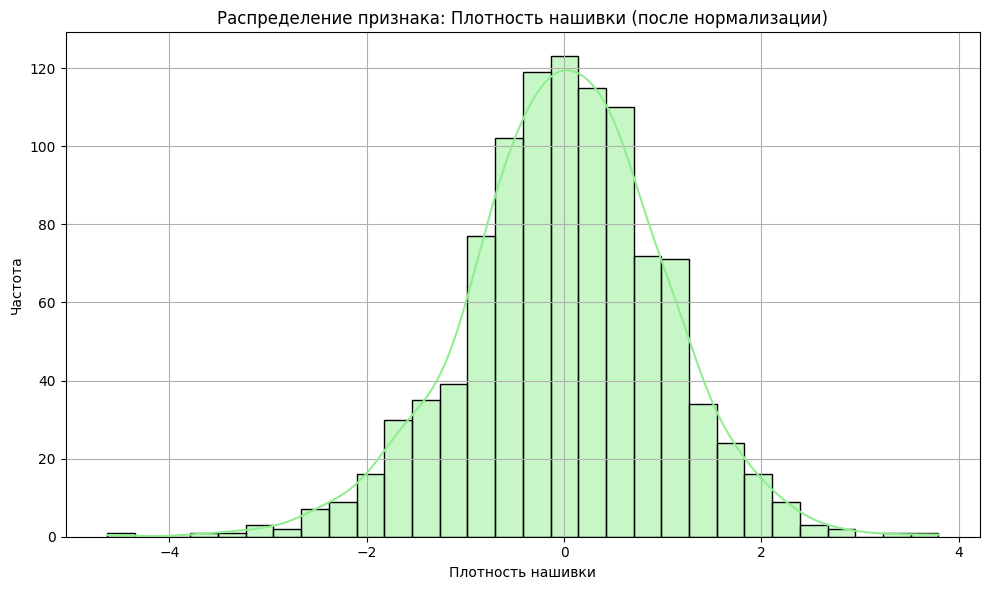

In [24]:
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

num_column = 0
for col in data_scaled.columns:
    num_column += 1
    plt.figure(figsize=(10, 6))
    sns.histplot(data_scaled[col], kde=True, bins=30, color='lightgreen')
    plt.title(f'Распределение признака: {col} (после нормализации)')
    plt.xlabel(col)
    plt.ylabel('Частота')
    plt.grid(True)
    plt.tight_layout()
    # plt.savefig(f"hist_after_{num_column}.png")  # сохраняем для отчета
    plt.show()
    plt.close()

Масштабирование признаков и целевых перменных

In [6]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)  # Только для сравнения после

Модель машинного обучения

In [7]:
# базовые модели
base_models = [
    ('elastic', ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000)),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('knn', KNeighborsRegressor(n_neighbors=5)),
]

# финальный регрессор
final_model = LinearRegression()

# стэкинг как один регрессор
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=final_model,
    passthrough=True,
    n_jobs=-1
)

model = MultiOutputRegressor(stacking_regressor)
model.fit(X_train_scaled, y_train_scaled)

MultiOutputRegressor(estimator=StackingRegressor(estimators=[('elastic',
                                                              ElasticNet(alpha=0.1,
                                                                         max_iter=10000)),
                                                             ('rf',
                                                              RandomForestRegressor(random_state=42)),
                                                             ('knn',
                                                              KNeighborsRegressor())],
                                                 final_estimator=LinearRegression(),
                                                 n_jobs=-1, passthrough=True))

Предсказание в стандартизированном пространстве

In [8]:
y_pred_scaled = model.predict(X_test_scaled)

Обратное преобразование к исходным значениям (попытка компенсации большого mse)

In [9]:
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_unscaled = scaler_y.inverse_transform(y_test_scaled)

Вычисление метрик (r^2, mse, mae, mape)

In [10]:
for i, col in enumerate(target_columns):
    mse = mean_squared_error(y_test_unscaled[:, i], y_pred[:, i])
    mae = mean_absolute_error(y_test_unscaled[:, i], y_pred[:, i])
    mape = mean_absolute_percentage_error(y_test_unscaled[:, i], y_pred[:, i])
    r2 = r2_score(y_test_unscaled[:, i], y_pred[:, i])
    print(f'{col}\n  MSE: {mse:.2f}\n  MAE: {mae:.2f}\n  MAPE: {mape:.2%}\n  R²: {r2:.3f}\n')

Модуль упругости при растяжении, ГПа
  MSE: 9.13
  MAE: 2.44
  MAPE: 3.32%
  R²: 0.061

Прочность при растяжении, МПа
  MSE: 229322.27
  MAE: 371.10
  MAPE: 16.95%
  R²: 0.045



Грфик распределения предсказаных и фактических значений перемнных

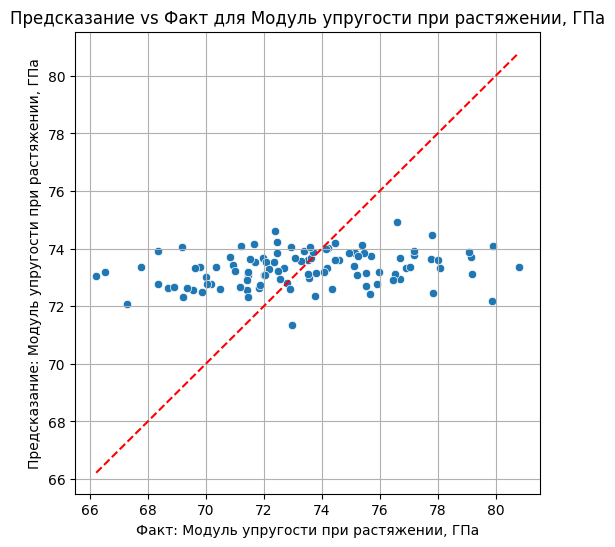

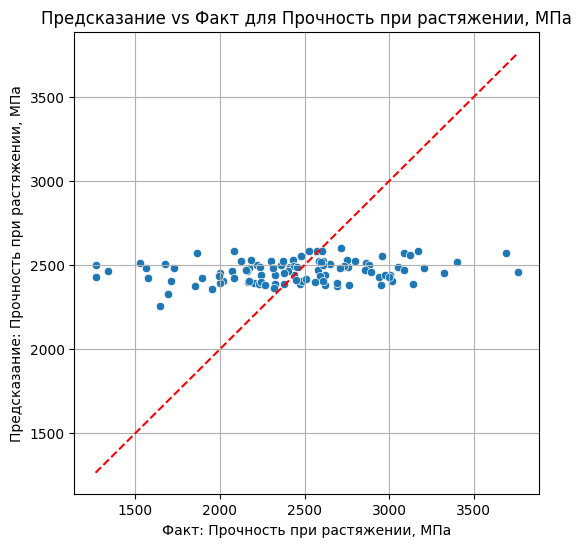

In [12]:
for i, col in enumerate(target_columns):
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=y_test.iloc[:, i], y=y_pred[:, i])
    plt.plot([y_test.iloc[:, i].min(), y_test.iloc[:, i].max()],
             [y_test.iloc[:, i].min(), y_test.iloc[:, i].max()],
             'r--')
    plt.xlabel(f'Факт: {col}')
    plt.ylabel(f'Предсказание: {col}')
    plt.title(f'Предсказание vs Факт для {col}')
    plt.grid(True)
    plt.show()

Сохранение обученной модели

In [14]:
joblib.dump(model, 'stacking_pipeline.pkl')

['stacking_pipeline.pkl']